# ggplot 600 - small multiples with facet wrap

This notebook shows how to make a sequence of a number of similar plots.  

facet wrap implements the [small multiple](https://en.wikipedia.org/wiki/Small_multiple) concept for plots that vary on one variable.

# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

In [2]:
dia = pd.read_csv('./dat/dia.csv')

# 2 - create one plot with one line per diamond cut

We can use color in the aes() to create one line for each value of  each way a diamond is cut. 

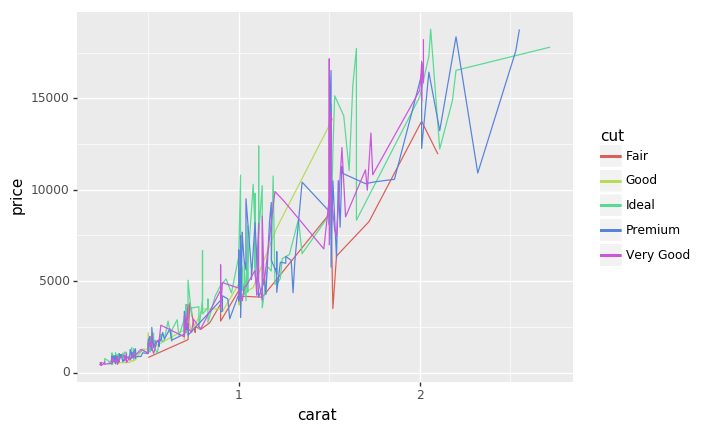

<ggplot: (-9223372036840130886)>

In [3]:
ggplot(data=dia, mapping=aes(x='carat', y='price',color='cut')) + \
    geom_line()

This plot is hard to read. With facet wrap we can create one separate plot for each cut.

# 3 - create 5 plot's (one for each cut)

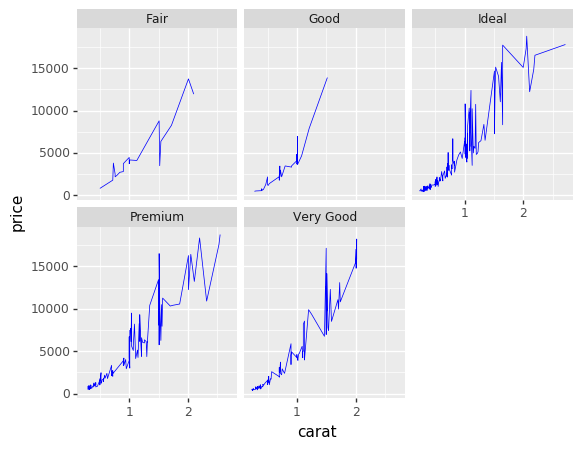

<ggplot: (-9223372036838611424)>

In [22]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_line(color='blue', size=0.3) + \
    facet_wrap(facets='cut')

facet_wrap has two properties that control the way the the plots are displayed:  
- nrow=... fixes the number of rows
- ncol=... fixes the number of columns

Note you can only use one of these two.

## 3.1 - use ncol=1 to compare along the x axis

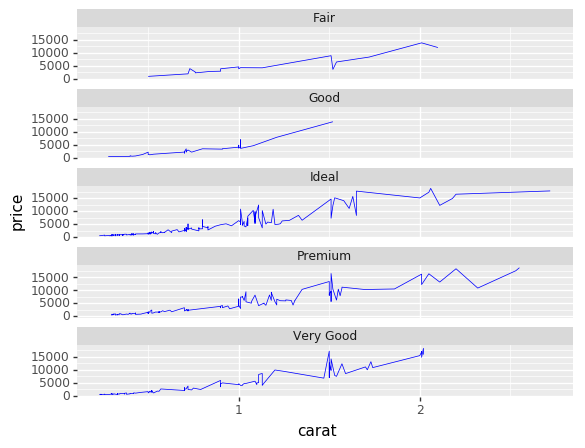

<ggplot: (-9223372036838715097)>

In [21]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_line(color='blue', size=0.3) + \
    facet_wrap(facets='cut', ncol=1)

## 3.2 - use nrow=1 to compare along the y axis

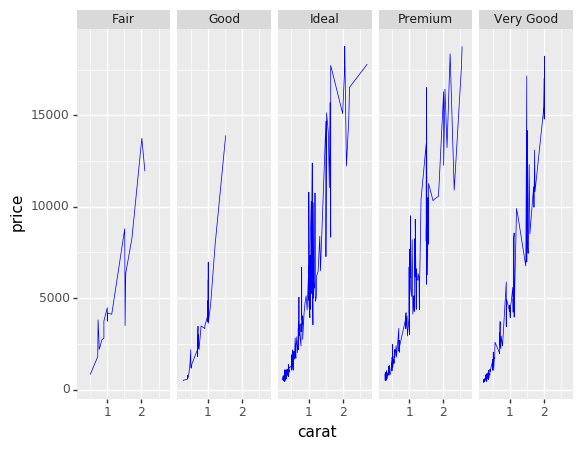

<ggplot: (-9223372036838366397)>

In [20]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_line(color='blue', size=0.3) + \
    facet_wrap(facets='cut', nrow=1)

# 4 - facet on two variables

It is possible to facet on two or more variables, by using facet='var1 + var2' or facet=[var1, var2] 

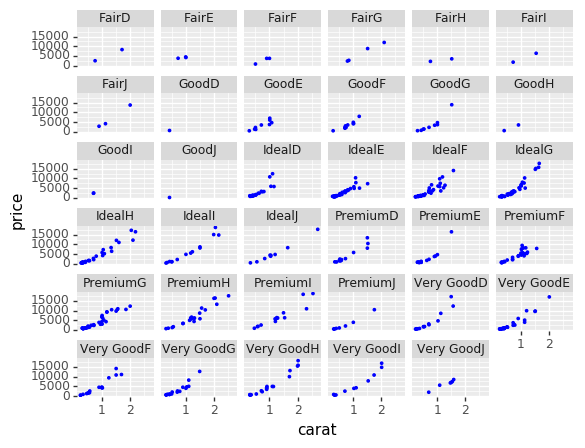

<ggplot: (16021596)>

In [17]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_point(color='blue', size=0.5) + \
    facet_wrap(facets='cut + color')

In this case setting ncol=7 gives a nice grid that is easier to interpret.

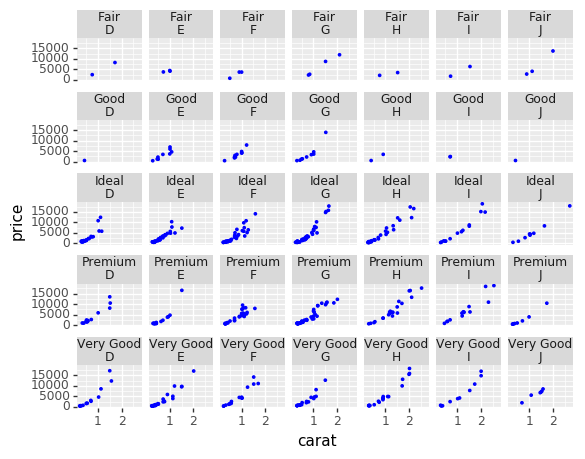

<ggplot: (14797120)>

In [16]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_point(color='blue', size=0.5) + \
    facet_wrap(facets=['cut','color'], ncol=7)

### Note
An even better way to make this kind of grids is to use facet_grid()

# Aesthetics

facet_wrap has as properties:

- facets=... ---- categorical variable use to separate on
- nrow= ... ----- number of rows in the output
- ncol= ... ----- number of columns in the output  
For more see the appendix below
 
**Note** color, linetype and size do not work.

## Appendix - the docstring of the plotnine function facet_wrap()

    """
    Wrap 1D Panels onto 2D surface
    Parameters
    ----------
    facets : formula | tuple | list
        Variables to groupby and plot on different panels.
        If a formula is used it should be right sided,
        e.g ``'~ a + b'``, ``('a', 'b')``
    nrow : int, optional
        Number of rows
    ncol : int, optional
        Number of columns
    scales : 'fixed' | 'free' | 'free_x' | 'free_y'
        Whether ``x`` or ``y`` scales should be allowed (free)
        to vary according to the data on each of the panel.
        Default is ``'fixed'``.
    shrink : bool
        Whether to shrink the scales to the output of the
        statistics instead of the raw data. Default is ``True``.
    labeller : str | function
        How to label the facets. If it is a ``str``, it should
        be one of ``'label_value'`` ``'label_both'`` or
        ``'label_context'``. Default is ``'label_value'``
    as_table : bool
        If ``True``, the facets are laid out like a table with
        the highest values at the bottom-right. If ``False``
        the facets are laid out like a plot with the highest
        value a the top-right. Default it ``True``.
    drop : bool
        If ``True``, all factor levels not used in the data
        will automatically be dropped. If ``False``, all
        factor levels will be shown, regardless of whether
        or not they appear in the data. Default is ``True``.
    dir : 'h' | 'v'
        Direction in which to layout the panels. ``h`` for
        horizontal and ``v`` for vertical.
    """